# ДЗ3 Анна Головина группа БКЛ213

Вы видите этот файл, потому что тетрадка получилась крайне тяжелая, пришлось резать на 2 части, а все из-за того, что код слишком тяжелый, а для DS Browse просто не хватает памяти компьютера.

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import sqlite3

# Первое задание

Поскольку у меня на компьютере нет памяти для установки читалок баз данных, мне проще кодом вытащить всю необходимую информацию. Запросы в маркдаун прописала перед ячейкой с кодом к кадому подпункту, так что и задание выполнила, и код с результатом работы показала. Начинаем с подключения к базе данных.

In [4]:
con = sqlite3.connect("imdb_small_indexed.db")
cur = con.cursor()

*4. С помощью запроса выберите год выхода и название фильмов с кем-то из ваших любимых актеров*

У меня нет любимых актеров, тем более в большом количестве, есть только любимая актриса. Вот если бы по любимым режиссерам надо было искать... тогда бы последняя строчка запроса была типа WHERE name IN (режиссер1, режиссер2, ..., режиссерN), но это сейчас был чисто выпендреж, чтобы показать, что я могу по нескольким людям искать. Поэтому поиск мой осуществлялся чисто по одному имени.

А еще тут помимо фильмов, где у Николь Кидман главная роль, есть всякие штуки типа где она в эпизодической роли или совсем маргинальные примеры типа видео с комик-кона, но тут фильтрация в запросе не спасет, так что как есть.

Запрос: """
SELECT title, premiered
FROM titles AS t
    JOIN crew ON t.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
WHERE name = "Nicole Kidman"
"""

In [112]:
fav_query = """
SELECT title, premiered
FROM titles AS t
    JOIN crew ON t.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
WHERE name = "Nicole Kidman"
"""

In [114]:
my_fav_act = [item for item in cur.execute(fav_query).fetchall()]
for i in range(len(my_fav_act)):
    print(f"№{i+1}: {my_fav_act[i][0]}, год выхода: {my_fav_act[i][1] or 'не указан'}")
# во втором слоте для переменной в форматированной строке вбила альтернативное значение, если в ячейке таблицы None

№1: BMX Bandits, год выхода: 1983
№2: Five Mile Creek, год выхода: 1983
№3: Windrider, год выхода: 1986
№4: The Bit Part, год выхода: 1988
№5: Bangkok Hilton, год выхода: 1989
№6: Dead Calm, год выхода: 1989
№7: Days of Thunder, год выхода: 1990
№8: Billy Bathgate, год выхода: 1991
№9: Emerald City, год выхода: 1988
№10: Flirting, год выхода: 1991
№11: Far and Away, год выхода: 1992
№12: Malice, год выхода: 1993
№13: My Life, год выхода: 1993
№14: Batman Forever, год выхода: 1995
№15: To Die For, год выхода: 1995
№16: The Portrait of a Lady, год выхода: 1996
№17: The Peacemaker, год выхода: 1997
№18: Eyes Wide Shut, год выхода: 1999
№19: Practical Magic, год выхода: 1998
№20: Vietnam, год выхода: 1987
№21: Cold Mountain, год выхода: 2003
№22: Birthday Girl, год выхода: 2001
№23: In the Cut, год выхода: 2003
№24: Moulin Rouge!, год выхода: 2001
№25: The Others, год выхода: 2001
№26: Winners, год выхода: 1985
№27: The Hours, год выхода: 2002
№28: Dogville, год выхода: 2003
№29: Havoc's L

*5. Выберите жанр и посчитайте кол-во фильмов по годам*

Выбрала хорроры, и для подсчета по годам использовала группировку по годам. Счет производила с помощью функции COUNT.

Запрос: """
SELECT premiered, COUNT(t.title_id)
FROM titles AS t
    JOIN film_genres AS fg ON t.title_id = fg.title_id
    JOIN genre_types AS gt ON fg.genre_id = gt.id
WHERE genre_name = "Horror"
GROUP BY premiered
"""

In [125]:
count_by_genre_query = """
SELECT premiered, COUNT(t.title_id)
FROM titles AS t
    JOIN film_genres AS fg ON t.title_id = fg.title_id
    JOIN genre_types AS gt ON fg.genre_id = gt.id
WHERE genre_name = "Horror"
GROUP BY premiered
"""

In [128]:
horror_by_year = [item for item in cur.execute(count_by_genre_query).fetchall()]

for item in horror_by_year:
    print(f"Год: {item[0] or 'не указан'}, количество: {item[1]}")

Год: не указан, количество: 7191
Год: 1909, количество: 1
Год: 1910, количество: 2
Год: 1912, количество: 3
Год: 1913, количество: 3
Год: 1914, количество: 5
Год: 1915, количество: 6
Год: 1916, количество: 13
Год: 1917, количество: 12
Год: 1918, количество: 6
Год: 1919, количество: 14
Год: 1920, количество: 25
Год: 1921, количество: 11
Год: 1922, количество: 6
Год: 1923, количество: 8
Год: 1924, количество: 6
Год: 1925, количество: 7
Год: 1926, количество: 8
Год: 1927, количество: 9
Год: 1928, количество: 7
Год: 1929, количество: 6
Год: 1930, количество: 3
Год: 1931, количество: 13
Год: 1932, количество: 22
Год: 1933, количество: 17
Год: 1934, количество: 15
Год: 1935, количество: 20
Год: 1936, количество: 18
Год: 1937, количество: 7
Год: 1938, количество: 5
Год: 1939, количество: 24
Год: 1940, количество: 18
Год: 1941, количество: 17
Год: 1942, количество: 17
Год: 1943, количество: 19
Год: 1944, количество: 23
Год: 1945, количество: 17
Год: 1946, количество: 19
Год: 1947, количество: 

*6. Найдите актеров-долгожителей*
- топ-10 по возрасту
- список тех, кто дожил до 100 лет и более

Я честно пыталась как нормальный человек все None заменить на другой год ((IFNULL(died, 2022)-IFNULL(born, 2022)) as age), чтобы те, у кого не указан год смерти получали возраст на данный момент, а те, о ком вообще ничего неизвестно улетали в конец списка (ну то есть там бы получался 0), но вышло как-то очень криво и жутко.

Ну то есть там есть человек с именем Paul Walsh (причем, не один), и поскольку в базе у него нет даты смерти, а год рождения указан как 21, то получается примерно следующее:

In [149]:
top_age_query = """
SELECT name, (IFNULL(died, 2022)-IFNULL(born, 2022)) as age
FROM people
WHERE name = "Paul Walsh"
"""

cur.execute(top_age_query).fetchall()

[('Paul Walsh', 0),
 ('Paul Walsh', 0),
 ('Paul Walsh', 0),
 ('Paul Walsh', 0),
 ('Paul Walsh', 2001)]

Засим я решила сдаться и посчитать втупую, игнорируя существование None. А также вспомнила про то, что в таблице *people* указаны не только актеры, так что необходимо отфильтровать именно актером (по условию).
Помимо того, поскольку очевидно, что если в базе есть люди старше 100 лет, они с высокой вероятностью попадут и в первый запрос, и во второй.
Что я только ни пыталась сделать, чтобы избежать составления двух одинаковых в определенном куске таблиц, но не вышло ничего, так что пусть будет как есть.

А еще вылезла очень неприятная вещь в виде дубликатов, которые я убрала, добавив в запрос DISTINCT (хотя можно как вариант еще получить в следующей ячейке список кортежей и преобразовать собственно список во множество, но тогда пропадает смысл в упорядочивании по убыванию).

Запрос: """
SELECT DISTINCT name, (died-born) as age
FROM people
    JOIN crew AS c ON people.person_id = c.person_id
    JOIN role_categories AS rc ON c.category = rc.id
WHERE role_type in ("actor", "actress")
ORDER BY age DESC
LIMIT 10
"""

In [16]:
top_age_query = """
SELECT DISTINCT c.person_id, name, (died-born) as act_age
FROM people
    JOIN crew AS c ON people.person_id = c.person_id
    JOIN role_categories AS rc ON c.category = rc.id
WHERE role_type in ("actor", "actress")
ORDER BY act_age DESC
LIMIT 10
"""

In [17]:
old = [item for item in cur.execute(top_age_query).fetchall()]
for each in old:
    print(f"Имя: {each[1]}; возраст: {each[2]}")

Имя: Germaine Auger; возраст: 112
Имя: Aliza Sommer-Herz; возраст: 111
Имя: Nino Cochise; возраст: 110
Имя: Octave Berthier; возраст: 109
Имя: Mary Mirabito Livornese Cavaliere; возраст: 109
Имя: Johannes Heesters; возраст: 108
Имя: Carmen Martínez Sierra; возраст: 108
Имя: Gerda Ring; возраст: 108
Имя: Boris Efimov; возраст: 108
Имя: Lucile Taft; возраст: 107


В уже имеющемся запросе убираю ограничение на 10 соответствий и добавляю условие о том, что возраст больше или равен 100.

Запрос: """
SELECT DISTINCT name, (died-born) as age
FROM people
    JOIN crew AS c ON people.person_id = c.person_id
    JOIN role_categories AS rc ON c.category = rc.id
WHERE age >= 100 AND role_type in ("actor", "actress")
ORDER BY age DESC
"""

In [5]:
over_100_age_query = """
SELECT DISTINCT c.person_id, name, (died-born) as act_age
FROM people
    JOIN crew AS c ON people.person_id = c.person_id
    JOIN role_categories AS rc ON c.category = rc.id
WHERE act_age >= 100 AND role_type in ("actor", "actress")
ORDER BY act_age DESC
"""

In [7]:
elderly = [item for item in cur.execute(over_100_age_query).fetchall()]
for each in elderly:
    print(f"Имя: {each[1]}; возраст: {each[2]}")

Имя: Germaine Auger; возраст: 112
Имя: Aliza Sommer-Herz; возраст: 111
Имя: Nino Cochise; возраст: 110
Имя: Octave Berthier; возраст: 109
Имя: Mary Mirabito Livornese Cavaliere; возраст: 109
Имя: Johannes Heesters; возраст: 108
Имя: Carmen Martínez Sierra; возраст: 108
Имя: Gerda Ring; возраст: 108
Имя: Boris Efimov; возраст: 108
Имя: Lucile Taft; возраст: 107
Имя: Emiko Azuma; возраст: 107
Имя: Pappukutty Bhagavathar; возраст: 107
Имя: Manoel de Oliveira; возраст: 107
Имя: Nora Roylance; возраст: 106
Имя: Doris Eaton; возраст: 106
Имя: Lupita Tovar; возраст: 106
Имя: Mary Ellis; возраст: 106
Имя: Julie Gibson; возраст: 106
Имя: Tonio Selwart; возраст: 106
Имя: Rosa Albach-Retty; возраст: 106
Имя: Yutaka Sada; возраст: 106
Имя: Lincoln Maazel; возраст: 106
Имя: Tania; возраст: 106
Имя: Beatrice Kane; возраст: 106
Имя: Pierre Gérald; возраст: 106
Имя: Juan Filloy; возраст: 106
Имя: Tyrus Wong; возраст: 106
Имя: Catherine Proctor; возраст: 105
Имя: Audrey Munson; возраст: 105
Имя: Anton 

*7. Посчитайте распределение оценок (округленных до ближайшего целого) для комедий и для документальных фильмов, постройте график для сравнения*

Я решила написать два запроса по каждому жанру и далее вставлять их в график как разные ломаные. Группировку организовала по оценочной шкале, то есть по всем целым числам оценки.

Каждый из запросов тестила выводом полученного списка.

In [23]:
com_query = """
SELECT ROUND(rating) as round_rating, COUNT(genre_name)
FROM rating AS r
    JOIN titles AS t ON t.title_id = r.title_id
    JOIN film_genres AS fg ON r.title_id = fg.title_id
    JOIN genre_types AS gt ON fg.genre_id = gt.id
WHERE genre_name = "Comedy"
GROUP BY round_rating
"""

cur.execute(com_query).fetchall() # оценки комедий и частотность

[(1.0, 138),
 (2.0, 717),
 (3.0, 2478),
 (4.0, 6503),
 (5.0, 14546),
 (6.0, 25271),
 (7.0, 24277),
 (8.0, 12327),
 (9.0, 1895),
 (10.0, 96)]

In [25]:
doc_query = """
SELECT ROUND(rating) as round_rating, COUNT(genre_name)
FROM rating AS r
    JOIN titles AS t ON t.title_id = r.title_id
    JOIN film_genres AS fg ON r.title_id = fg.title_id
    JOIN genre_types AS gt ON fg.genre_id = gt.id
WHERE genre_name = "Documentary"
GROUP BY round_rating
"""

cur.execute(doc_query).fetchall() # оценки документалок и частотность

[(1.0, 34),
 (2.0, 115),
 (3.0, 282),
 (4.0, 643),
 (5.0, 1724),
 (6.0, 5992),
 (7.0, 16237),
 (8.0, 15334),
 (9.0, 5075),
 (10.0, 213)]

Собственно, график (примитивно, зато, вроде, правильно):

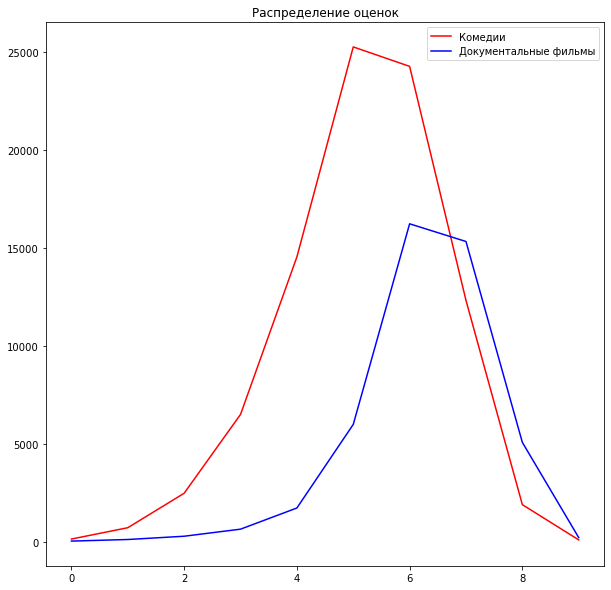

In [26]:
plt.figure(figsize=(10, 10))
plt.title("Распределение оценок")
com = plt.plot(
    [i[1] for i in cur.execute(com_query).fetchall()], color="red", label="Комедии"
)
doc = plt.plot(
    [j[1] for j in cur.execute(doc_query).fetchall()],
    color="blue",
    label="Документальные фильмы",
)

plt.legend(loc="best")

plt.show()

*8. Сохраните результат пункта 6 в базе в новой таблице*

Тут ничего особенного, просто создала таблицу, как показано в конспектах, назвала *old_actors*, добавила айди актера (чтобы можно было присоединять, например, к таблице *people*), имя и возраст (я не очень поняла, какой именно запрос из п.6 надо добавлять, так что сначала создала таблицу с теми, кто старше 100 лет и думала только ее и оставить, там в приницпе по обоим запросам результаты пересекаются, так что разница здесь только в количестве строчек в новой таблице).

In [8]:
cur.execute("""
CREATE TABLE old_actors (
    actor_id INT,
    actor_name TEXT,
    over_100 INT,
    PRIMARY KEY (actor_id)
)
""")

data = cur.execute(over_100_age_query).fetchall() # не вижу смысла тут дублировать запрос, он уже был запущен на несколько ячеек выше

cur.executemany("INSERT INTO old_actors VALUES (?, ?, ?)", data)

con.commit()

Потом я подумала, что меня не сильно напряжет создание второй таблицы (вгонять все в одну и заполнять по запросу топа старейших нулями всех, кроме собственно топ-10 кажется абсурдом).

In [19]:
cur.execute("""
CREATE TABLE top_old (
    actor_id INT,
    actor_name TEXT,
    age INT,
    PRIMARY KEY (actor_id)
)
""")

data = cur.execute(top_age_query).fetchall() # не вижу смысла тут дублировать запрос

cur.executemany("INSERT INTO top_old VALUES (?, ?, ?)", data)

con.commit()